In [127]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [190]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Time.max()/60/60/48

1.9999074074074075

In [117]:
df['TimeScaled'] = df.Time/60/60/48
df['TimeSin'] = np.sin(2*np.pi*df.Time/60/60/24) 
df['TimeCos'] = np.cos(2*np.pi*df.Time/60/60/24) 

In [118]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,TimeScaled,TimeSin,TimeCos
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.548691,-0.266787,-0.140733
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,0.274816,0.628132,0.717268
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,0.313666,-0.841236,-0.837083
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.490116,-0.435624,-0.311920
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,0.806253,0.247422,0.597800
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,0.999954,1.000000,1.000000


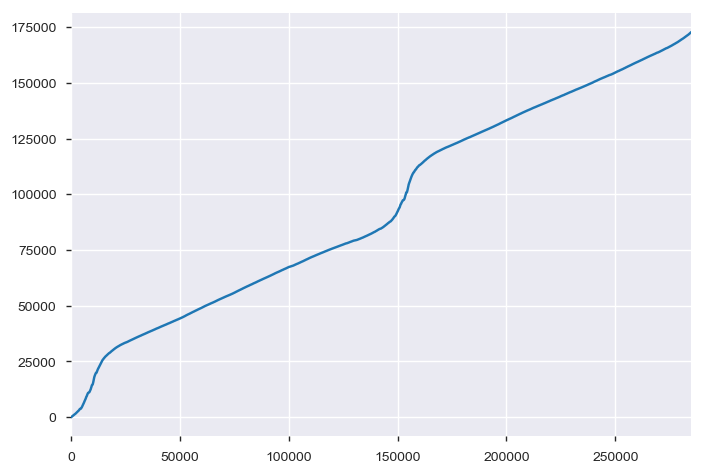

In [130]:
df.Time.plot()

In [129]:
profile = pandas_profiling.ProfileReport(df,bins=20,check_correlation=True)

KeyboardInterrupt: 

In [21]:
profile

Number of variables,31
Number of observations,284807
Total Missing (%),0.0%
Total size in memory,67.4 MiB
Average record size in memory,248.0 B
Numeric,30
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


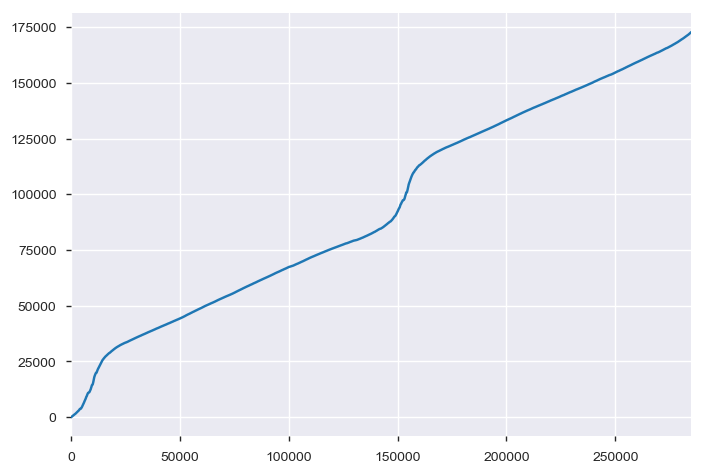

In [131]:
df.Time.plot()

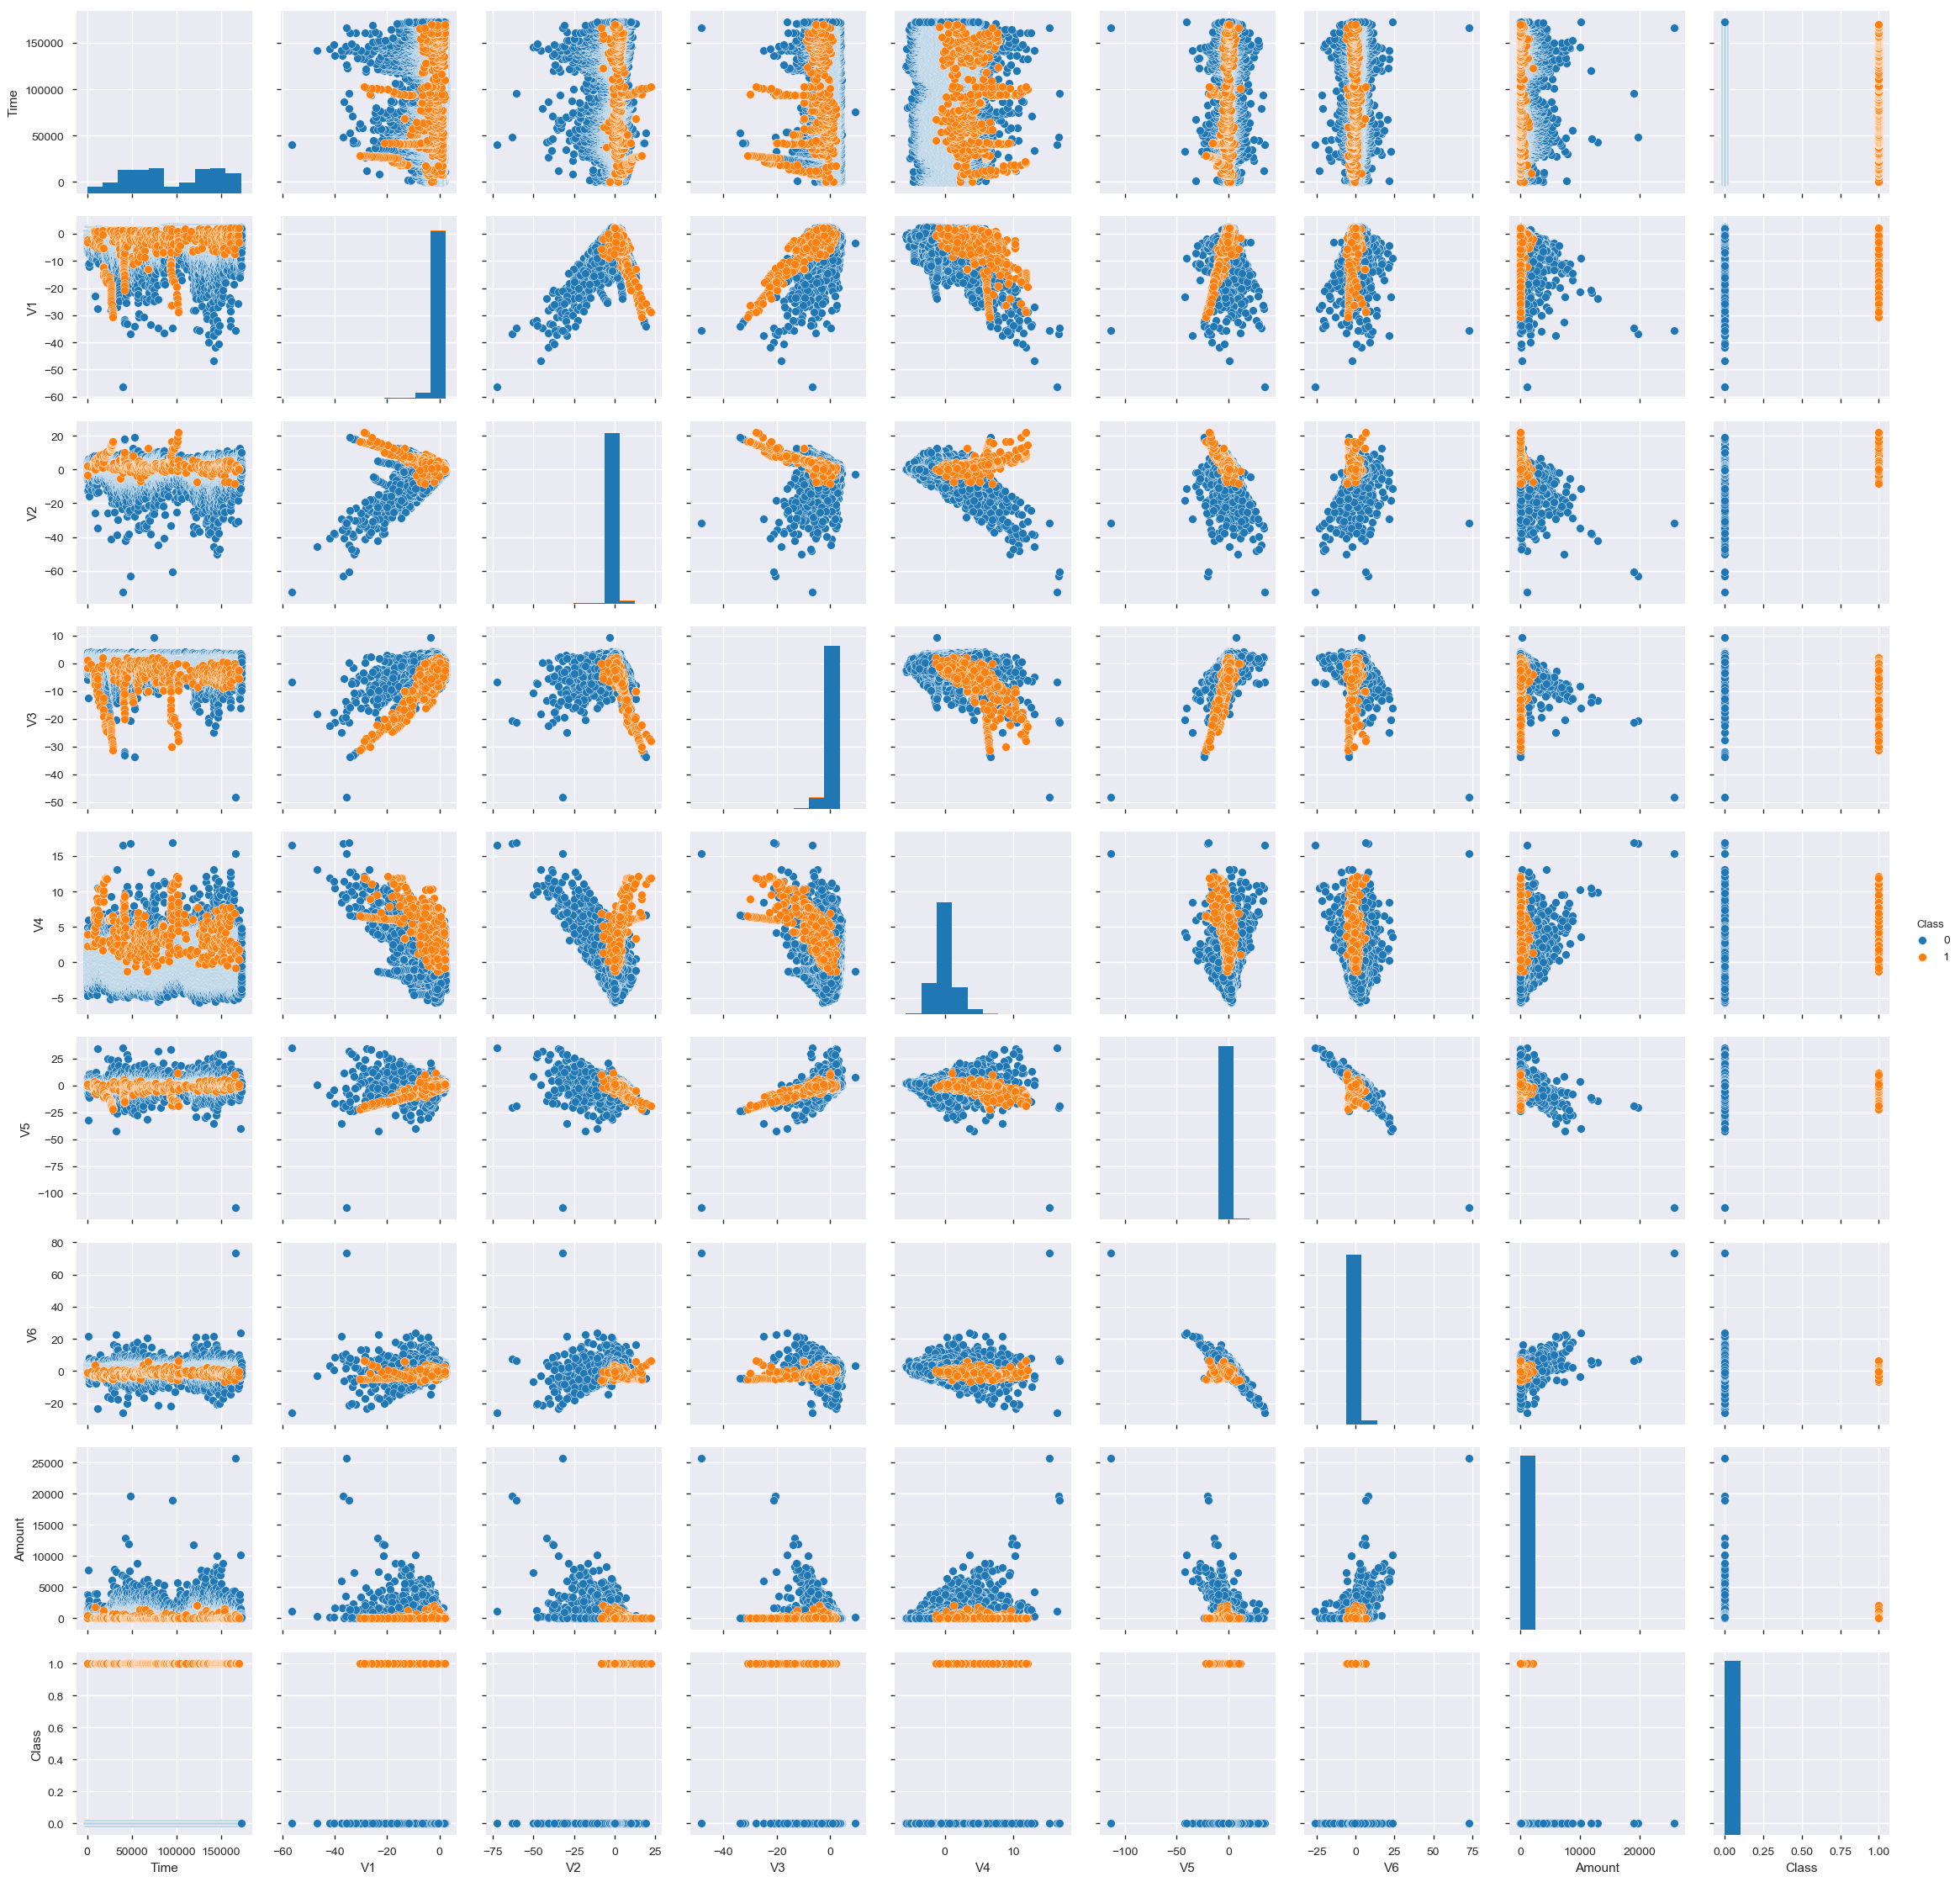

In [29]:
sns.pairplot(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'Amount',
       'Class']],hue='Class')

In [26]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

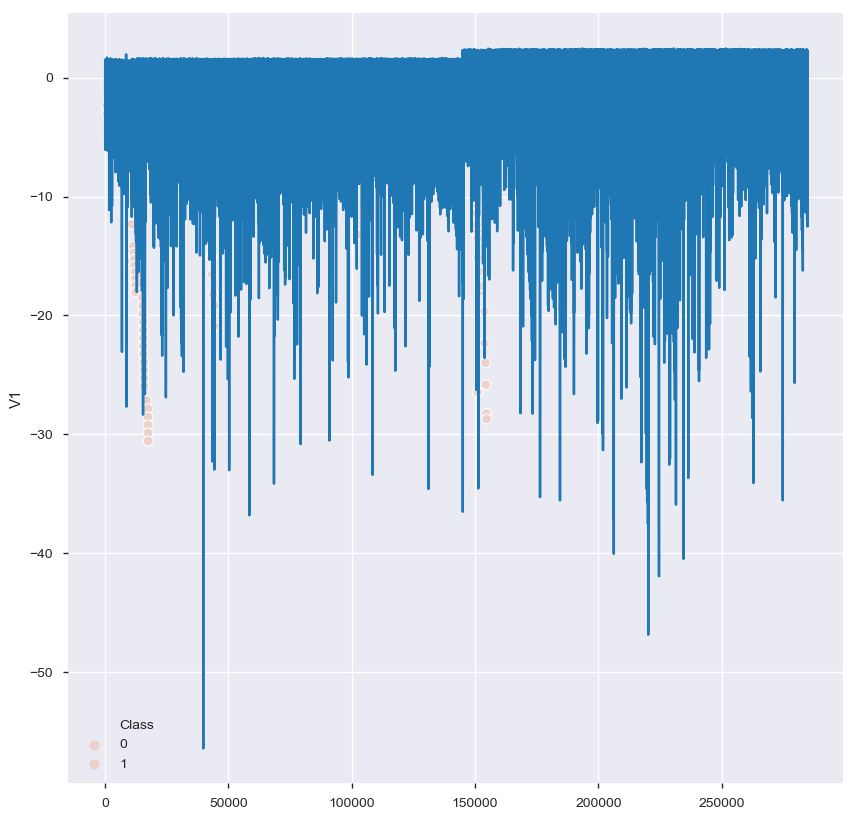

In [132]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df[df.Class==0],x=df[df.Class==0].index, y='V1')
sns.scatterplot(data=df[df.Class==1],x=df[df.Class==1].index, y=df[df.Class==1].V1,hue='Class')
plt.show()

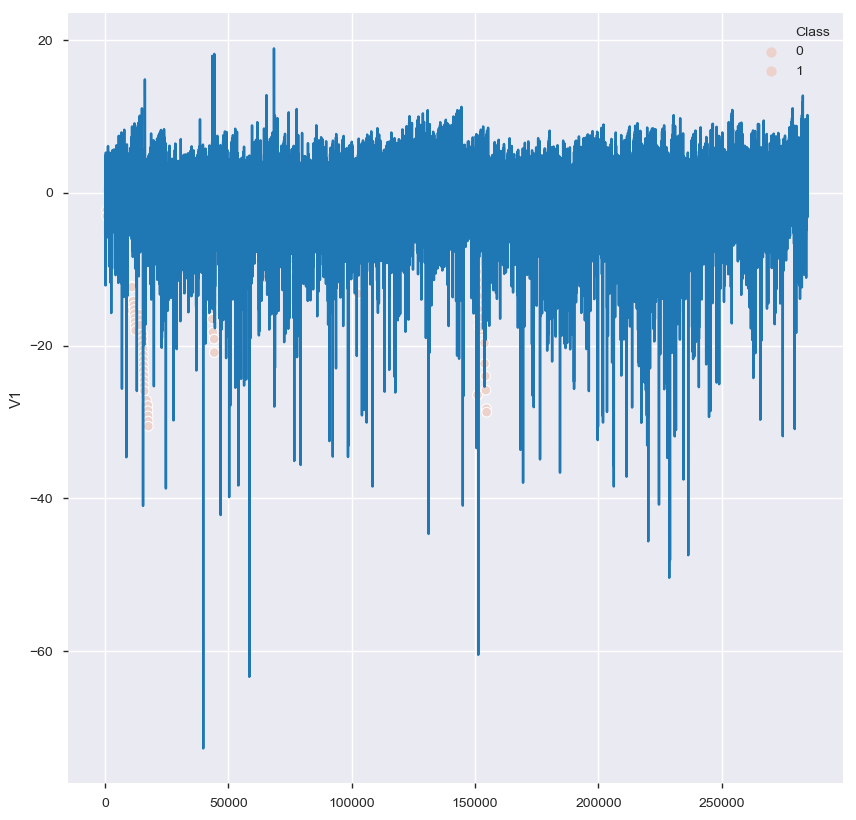

In [133]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df[df.Class==0],x=df[df.Class==0].index, y='V2')
sns.scatterplot(data=df[df.Class==1],x=df[df.Class==1].index, y=df[df.Class==1].V1,hue='Class')
plt.show()

KeyboardInterrupt: 

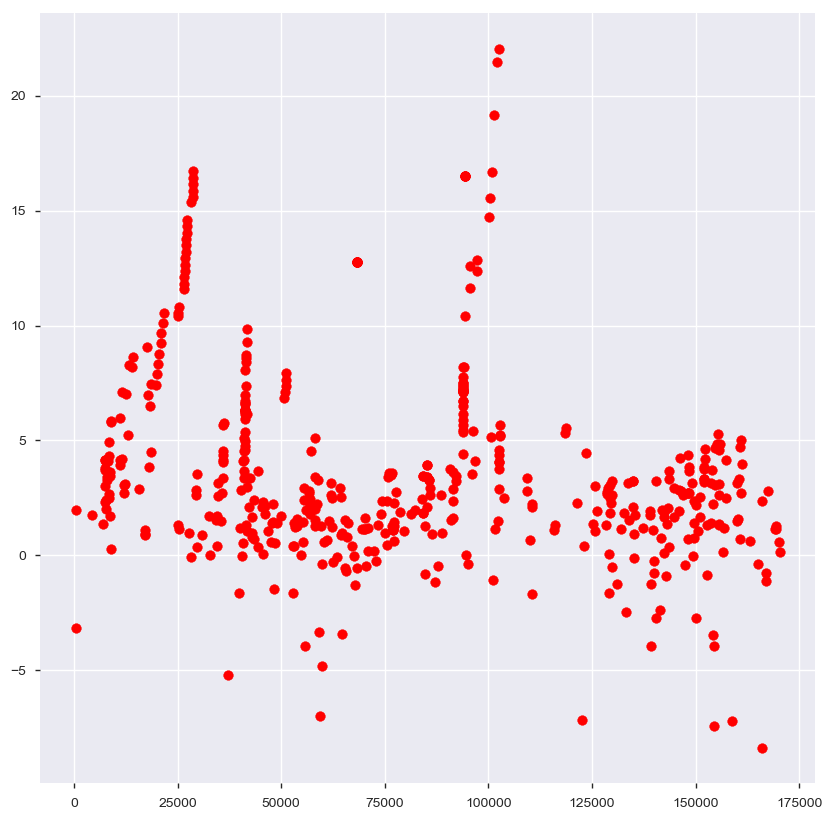

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(x=df[df.Class==1].Time, y=df[df.Class==1].V2,c='Red')
sns.lineplot(data=df[df.Class==0],x=df[df.Class==0].Time, y='V2')

plt.show()

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

/Users/danky/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
rf = RandomForestClassifier()

In [9]:
df_small = df[:10000]
rf.fit(df_small.drop(columns=['Class','Time']),df_small.Class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[0.00175549 0.03243243 0.11538462 0.20425532 0.23857868 0.25988701
 0.28220859 0.30872483 0.35384615 0.38016529 0.41071429 0.42592593
 0.44660194 0.46938776 0.4742268  0.47916667 0.49462366 0.50549451
 0.52941176 0.53012048 0.54320988 0.55       0.5443038  0.55128205
 0.54545455 0.55263158 0.54666667 0.55405405 0.56164384 0.55555556
 0.54929577 0.54285714 0.53623188 0.52941176 0.51515152 0.515625
 0.50819672 0.5        0.46296296 0.46153846 0.5        0.62162162
 0.56666667 0.64       0.68181818 0.78947368 0.76470588 0.8
 1.         1.         1.        ]
[1.   0.96 0.96 0.96 0.94 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92
 0.92 0.92 0.92 0.92 0.9  0.88 0.88 0.88 0.86 0.86 0.84 0.84 0.82 0.82
 0.82 0.8  0.78 0.76 0.74 0.72 0.68 0.66 0.62 0.58 0.5  0.48 0.48 0.46
 0.34 0.32 0.3  0.3  0.26 0.16 0.1  0.08 0.  ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00175549 0.07448494 0.32413793 0.51086957 0.65277778 0.74603175
 0.81034483 0.85454545 0.90196078 0.89795918 0.91304348 0.91111111
 0.90909091 0.95121951 0.94871795 0.94736842 0.94594595 0.94117647
 0.9375     0.93103448 0.92857143 0.92592593 0.92307692 0.96
 0.95833333 0.95652174 0.95454545 0.95238095 0.95       1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
[1.   0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.92 0.88 0.84 0.82 0.8  0.78
 0.74 0.72 0.7  0.64 0.6  0.54 0.52 0.5  0.48 0.48 0.46 0.44 0.42 0.4
 0.38 0.38 0.36 0.34 0.3  0.26 0.2  0.18 0.12 0.1  0.06 0.02 0.  ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.07227139 0.26666667 0.46153846 0.64864865 0.77419355 0.85714286
 0.87272727 0.88888889 0.90566038 0.92307692 0.96       0.97916667
 0.9787234  0.97826087 0.97727273 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[1.         0.97959184 0.97959184 0.97959184 0.97959184 0.97959184
 0.97959184 0.97959184 0.97959184 0.97959184 0.97959184 0.95918367
 0.93877551 0.91836735 0.87755102 0.87755102 0.85714286 0.83673469
 0.81632653 0.7755102  0.75510204 0.73469388 0.71428571 0.69387755
 0.65306122 0.6122449  0.59183673 0.57142857 0.51020408 0.48979592
 0.44897959 0.3877551  0.36734694 0.34693878 0.30612245 0.24489796
 0.2244898  0.18367347 0.16326531 0.14285714 0.10204082 0.02040816
 0.        ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172045 0.10192837 0.46835443 0.7254902  0.8        0.85714286
 0.92307692 0.94736842 0.97297297 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.         0.75510204 0.75510204 0.75510204 0.73469388 0.73469388
 0.73469388 0.73469388 0.73469388 0.73469388 0.71428571 0.69387755
 0.67346939 0.63265306 0.57142857 0.55102041 0.53061224 0.51020408
 0.48979592 0.46938776 0.44897959 0.42857143 0.40816327 0.3877551
 0.36734694 0.34693878 0.26530612 0.2244898  0.14285714 0.12244898
 0.06122449 0.04081633 0.02040816 0.        ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172045 0.08658009 0.34821429 0.609375   0.75       0.7755102
 0.80851064 0.84444444 0.86363636 0.86046512 0.85714286 0.875
 0.8974359  0.89473684 0.91891892 0.94444444 0.93333333 0.93103448
 0.92857143 0.92307692 0.91666667 0.91304348 0.90909091 0.89473684
 0.88888889 0.86666667 0.84615385 0.81818182 0.8        0.875
 0.85714286 0.75       0.5        1.        ]
[1.         0.81632653 0.79591837 0.79591837 0.79591837 0.7755102
 0.7755102  0.7755102  0.7755102  0.75510204 0.73469388 0.71428571
 0.71428571 0.69387755 0.69387755 0.69387755 0.57142857 0.55102041
 0.53061224 0.48979592 0.44897959 0.42857143 0.40816327 0.34693878
 0.32653061 0.26530612 0.2244898  0.18367347 0.16326531 0.14285714
 0.12244898 0.06122449 0.02040816 0.        ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172051 0.02262211 0.0628655  0.09579439 0.13099042 0.17154812
 0.20512821 0.24539877 0.28169014 0.34482759 0.39795918 0.46987952
 0.53424658 0.57352941 0.62903226 0.6440678  0.64912281 0.67272727
 0.68518519 0.69811321 0.71153846 0.7254902  0.74       0.73469388
 0.72916667 0.74468085 0.73913043 0.77272727 0.79069767 0.82051282
 0.84210526 0.83783784 0.83333333 0.82857143 0.82352941 0.81818182
 0.8125     0.80645161 0.83333333 0.82142857 0.80769231 0.7826087
 0.77272727 0.8125     0.78571429 0.7        0.66666667 0.71428571
 0.66666667 0.6        1.         1.         1.        ]
[1.         0.89795918 0.87755102 0.83673469 0.83673469 0.83673469
 0.81632653 0.81632653 0.81632653 0.81632653 0.79591837 0.79591837
 0.79591837 0.79591837 0.79591837 0.7755102  0.75510204 0.75510204
 0.75510204 0.75510204 0.75510204 0.75510204 0.75510204 0.73469388
 0.71428571 0.71428571 0.69387755 0.69387755 0.69387755 0.65306122
 0.65306122 0.63265306 0.6122449  0.59183673 0.57142857 0.55102041
 0.530

/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172051 0.05504587 0.20524017 0.37704918 0.54117647 0.66666667
 0.6969697  0.75409836 0.79310345 0.80357143 0.82692308 0.85714286
 0.875      0.89361702 0.91304348 0.93333333 0.95454545 0.95348837
 0.95238095 0.94736842 0.94594595 0.94444444 0.94285714 0.94117647
 0.96969697 0.96875    0.96774194 0.96666667 0.96551724 0.96428571
 0.96296296 0.96       0.95652174 0.95454545 0.95238095 0.95
 0.94736842 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[1.         0.97959184 0.95918367 0.93877551 0.93877551 0.93877551
 0.93877551 0.93877551 0.93877551 0.91836735 0.87755102 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.83673469
 0.81632653 0.73469388 0.71428571 0.69387755 0.67346939 0.65306122
 0.65306122 0.63265306 0.6122449  0.59183673 0.57142857 0.55102041
 0.53061224 0.48979592 0.44897959 0.42857143 0.40816327 0.3877551
 0.36734694 0.36734694 0.32653061 0.30612245 0.28571429 0.26530612
 0.24

/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172051 0.06077348 0.23243243 0.41176471 0.57142857 0.64516129
 0.70175439 0.72727273 0.75471698 0.78       0.79591837 0.82978723
 0.90697674 0.92857143 0.95121951 0.975      1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
[1.         0.89795918 0.87755102 0.85714286 0.81632653 0.81632653
 0.81632653 0.81632653 0.81632653 0.79591837 0.79591837 0.79591837
 0.79591837 0.79591837 0.79591837 0.79591837 0.79591837 0.7755102
 0.75510204 0.73469388 0.69387755 0.67346939 0.65306122 0.63265306
 0.6122449  0.59183673 0.57142857 0.55102041 0.53061224 0.48979592
 0.44897959 0.42857143 0.40816327 0.3877551  0.32653061 0.30612245
 0.26530612 0.24489796 0.18367347 0.16326531 0.08163265 0.06122449
 0.04081633 0.        ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172051 0.06955178 0.30405405 0.45263158 0.58823529 0.63492063
 0.73584906 0.79591837 0.82978723 0.90697674 0.975      1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
[1.         0.91836735 0.91836735 0.87755102 0.81632653 0.81632653
 0.79591837 0.79591837 0.79591837 0.79591837 0.79591837 0.79591837
 0.7755102  0.75510204 0.73469388 0.71428571 0.69387755 0.65306122
 0.63265306 0.6122449  0.59183673 0.57142857 0.55102041 0.53061224
 0.51020408 0.48979592 0.46938776 0.36734694 0.34693878 0.26530612
 0.24489796 0.2244898  0.20408163 0.14285714 0.12244898 0.08163265
 0.06122449 0.02040816 0.        ]


/Users/danky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.00172051 0.08216433 0.28057554 0.39784946 0.46753247 0.5
 0.58064516 0.64285714 0.65454545 0.73469388 0.75       0.76595745
 0.8        0.8372093  0.85714286 0.87804878 0.9        0.92307692
 0.94736842 0.97297297 0.97222222 0.97142857 0.97058824 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[1.         0.83673469 0.79591837 0.75510204 0.73469388 0.73469388
 0.73469388 0.73469388 0.73469388 0.73469388 0.73469388 0.73469388
 0.73469388 0.73469388 0.73469388 0.73469388 0.73469388 0.73469388
 0.73469388 0.73469388 0.71428571 0.69387755 0.67346939 0.67346939
 0.65306122 0.6122449  0.59183673 0.57142857 0.55102041 0.53061224
 0.51020408 0.48979592 0.46938776 0.42857143 0.34693878 0.24489796
 0.18367347 0.16326531 0.14285714 0.12244898 0.10204082 0.04081633
 0.        ]


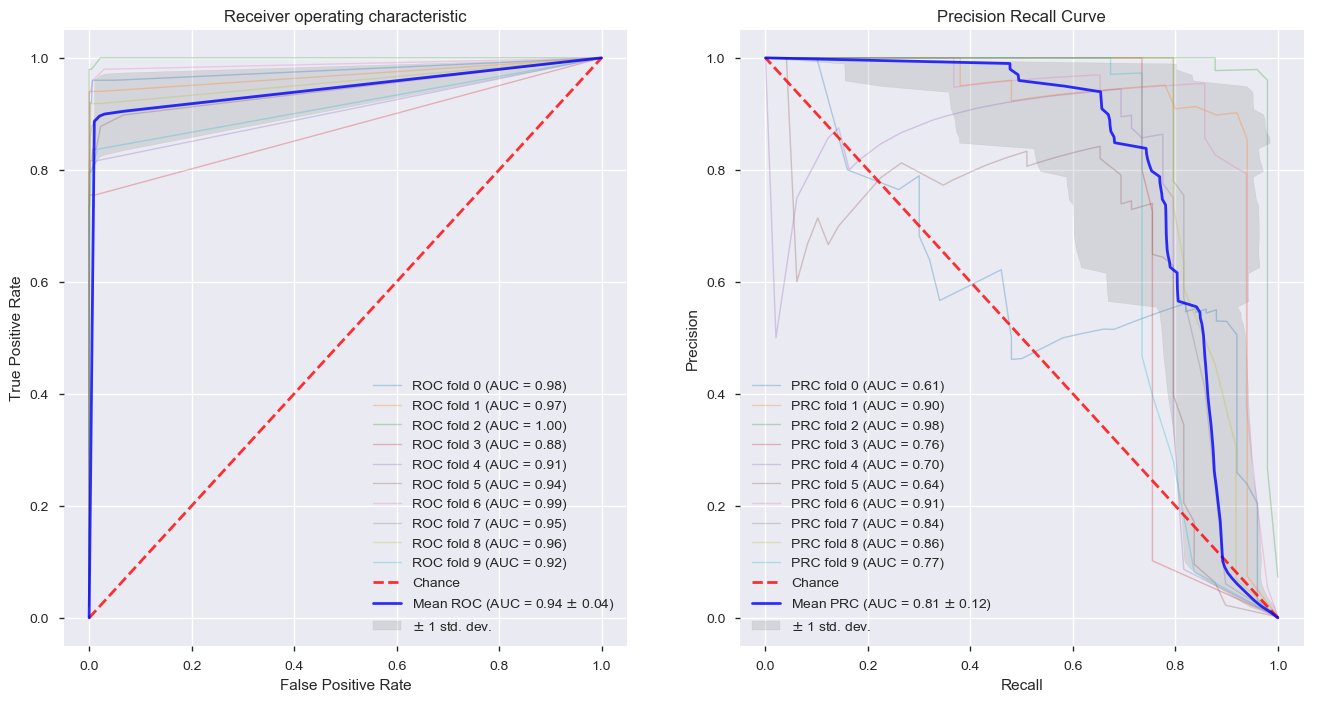

In [208]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df.drop(columns=['Class','Time']).to_numpy()
y = (df.Class).to_numpy()
n_samples, n_features = X.shape




np.random.seed(17231231)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
recalls = []
mean_precs = np.linspace(0, 1, 100)
aucs2 = []
plt.figure(figsize=(16,8))
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    
    plt.subplot(121)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    prec,rec, thresholds2 = sklearn.metrics.precision_recall_curve(y[test], probas_[:, 1])
    recalls.append(interp(mean_precs, prec, rec))
    recalls[-1][0] = 1.0
    print(prec)
    print(rec)
    prc_auc = auc(rec,prec)
    aucs2.append(prc_auc)
    plt.subplot(122)
    plt.plot(rec, prec, lw=1, alpha=0.3,
             label='PRC fold %d (AUC = %0.2f)' % (i, prc_auc))

    i += 1
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


mean_rec = np.mean(recalls, axis=0)
mean_rec[-1] = 0.0
mean_auc2 = auc(mean_rec,mean_precs)
std_auc2 = np.std(aucs2)
std_rec = np.std(recalls, axis=0)
recs_upper = np.minimum(mean_rec + std_rec, 1)
recs_lower = np.maximum(mean_rec - std_rec, 0)



plt.subplot(121)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot([1, 0], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

plt.plot(mean_rec,mean_precs, color='b',
         label=r'Mean PRC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc2, std_auc2),
         lw=2, alpha=.8)

plt.fill_betweenx(mean_precs, recs_lower, recs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")


plt.show()

In [200]:
prec,rec, thresholds2 = sklearn.metrics.precision_recall_curve(y[test], probas_[:, 1])

In [202]:
rec

array([1.        , 0.78658537, 0.77439024, 0.74390244, 0.7195122 ,
       0.68292683, 0.56707317, 0.45731707, 0.3597561 , 0.23170732,
       0.14634146, 0.        ])

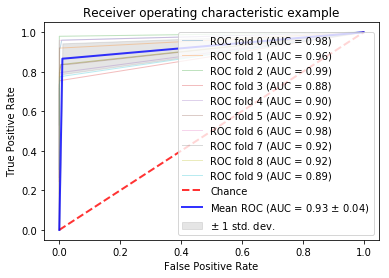

In [96]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df.drop(columns=['Class','Time']).to_numpy()
y = (df.Class).to_numpy()
n_samples, n_features = X.shape




np.random.seed(17231231)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(class_weight=None)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [111]:
weights = sklearn.utils.class_weight.compute_class_weight('balanced',classes=[0,1],y=df.Class)

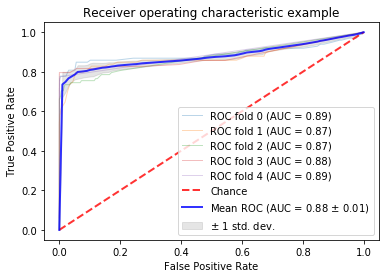

In [113]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df[['V12','V14','V17','TimeScaled']].to_numpy()
y = (df.Class).to_numpy()
n_samples, n_features = X.shape


np.random.seed(17231231)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

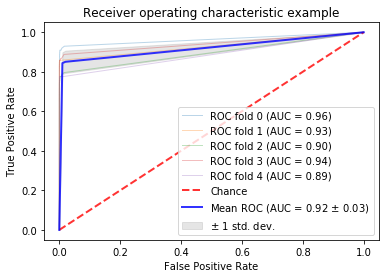

In [114]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df[['V12','V14','V17']].to_numpy()
y = (df.Class).to_numpy()
n_samples, n_features = X.shape


np.random.seed(17231231)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

/Users/danky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/danky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


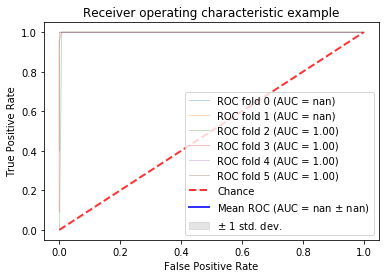

In [42]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import TimeSeriesSplit

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df_small.drop(columns=['Class','Time']).to_numpy()
y = (df_small.Class).to_numpy()
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = TimeSeriesSplit(n_splits=6)
classifier = RandomForestClassifier(random_state=random_state,class_weight=None)

tprs = []
aucs = []
recalls = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    classifier.fit(X[train], y[train])
    probas_ = classifier.predict_proba(X[test])
    y_pred = classifier.predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    recalls.append( sklearn.metrics.recall_score(y[test],y_pred) )
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [98]:
for i,var in enumerate(classifier.feature_importances_):
    print('{:2d}: {:4.2f}%'.format(i+1,100*var))

 1: 1.15%
 2: 1.77%
 3: 1.93%
 4: 3.00%
 5: 1.03%
 6: 1.86%
 7: 1.54%
 8: 2.09%
 9: 3.85%
10: 9.15%
11: 2.36%
12: 23.10%
13: 1.29%
14: 7.68%
15: 1.16%
16: 6.99%
17: 13.12%
18: 3.65%
19: 1.68%
20: 1.06%
21: 1.17%
22: 1.07%
23: 0.62%
24: 1.74%
25: 0.67%
26: 1.70%
27: 1.48%
28: 1.03%
29: 1.04%


/Users/danky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


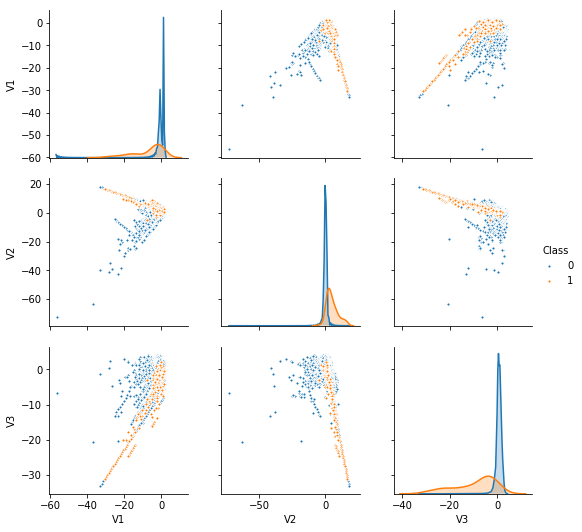

In [116]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df[:60000],hue='Class',vars=['V1','V2','V3'],plot_kws=dict(s=10, edgecolor="w", linewidth=1))
plt.show()

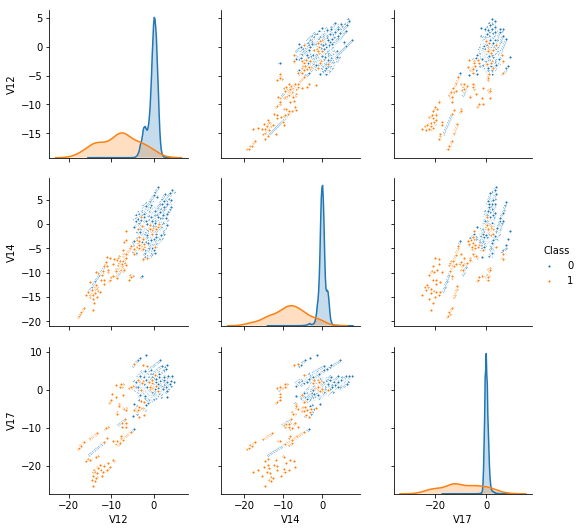

In [85]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df[:60000],hue='Class',vars=['V12','V14','V17'],plot_kws=dict(s=10, edgecolor="w", linewidth=1))
plt.show()

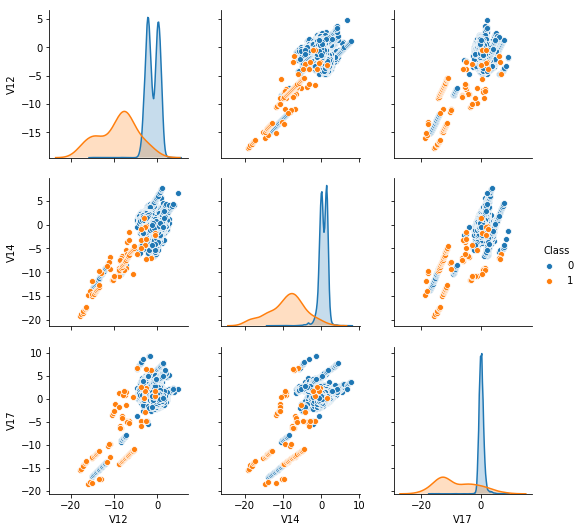

In [65]:
sns.pairplot(data=df[:20000],hue='Class',vars=['V12','V14','V17'])

In [19]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import TimeSeriesSplit

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df_small.drop(columns=['Class','Time']).to_numpy()
y = (df_small.Class).to_numpy()
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = TimeSeriesSplit(n_splits=6)
classifier = RandomForestClassifier(random_state=random_state,class_weight=None)

tprs = []
aucs = []
recalls = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    classifier.fit(X[train], y[train])
    probas_ = classifier.predict_proba(X[test])
    y_pred = classifier.predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    recalls.append( sklearn.metrics.recall_score(y[test],y_pred) )
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    i += 1


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)


std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)



[0.0, 0.0, 0.0, 0.09090909090909091, 1.0, 1.0]

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[1417    1]
 [   0   10]]


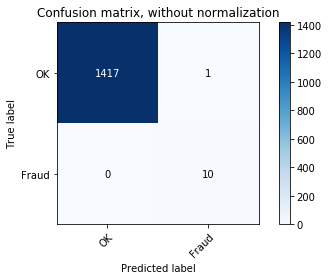

### xgboost

In [137]:
import xgboost as xgb

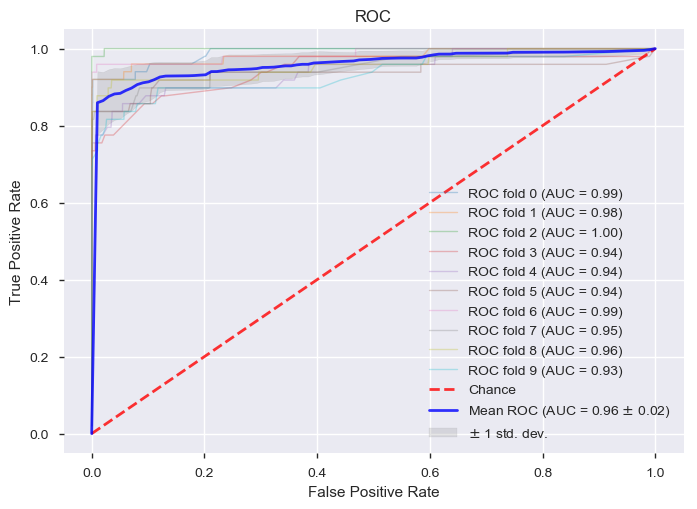

In [189]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = df[['V12','V14','V17']].to_numpy()
y = (df.Class).to_numpy()
n_samples, n_features = X.shape


np.random.seed(17231231)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

# Model
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced')
param = {'max_depth': 2, 'eta': 1, 'verbosity': 0, 'objective': 'binary:logistic','scale_pos_weight':1}
param['nthread'] = 4
param['eval_metric'] = 'auc'



num_round = 50




tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):

    dtrain = xgb.DMatrix(X[train], label=y[train])
    dtest = xgb.DMatrix(X[test], label=y[test])
    evallist = [ (dtrain, 'train'),(dtest, 'eval')]
    bst = xgb.train(param, dtrain, num_round,evals= evallist,early_stopping_rounds=10,verbose_eval=False)
    probas_ = bst.predict(dtest)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [140]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size = 0.2, random_state = 0)

data = df_train.drop(columns=['Class','Time'])
label = df_train.Class
dtrain = xgb.DMatrix(data, label=label)

data = df_test.drop(columns=['Class','Time'])
label = df_test.Class
dtest = xgb.DMatrix(data, label=label)

/Users/danky/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/danky/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [182]:
param = {'max_depth': 2, 'eta': 1, 'verbosity': 1, 'objective': 'binary:logistic','scale_pos_weight':1}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [ (dtrain, 'train'),(dtest, 'eval')]

# You can also specify multiple eval metrics:

# param['eval_metric'] = ['auc', 'ams@0']

# alternatively:
# plst = param.items()
# plst += [('eval_metric', 'ams@0')]

# Specify validations set to watch performance



In [183]:
param = {'max_depth': 2, 'eta': 1, 'verbosity': 1, 'objective': 'binary:logistic','scale_pos_weight':1}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [ (dtrain, 'train'),(dtest, 'eval')]

num_round = 20
bst = xgb.train(param, dtrain, num_round,evals= evallist,early_stopping_rounds=5)

[0]	train-auc:0.880927	eval-auc:0.87606
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 5 rounds.
[1]	train-auc:0.916705	eval-auc:0.925552
[2]	train-auc:0.919209	eval-auc:0.935436
[3]	train-auc:0.922907	eval-auc:0.940238
[4]	train-auc:0.953272	eval-auc:0.947053
[5]	train-auc:0.963636	eval-auc:0.950439
[6]	train-auc:0.971398	eval-auc:0.952771
[7]	train-auc:0.980811	eval-auc:0.961423
[8]	train-auc:0.984027	eval-auc:0.963442
[9]	train-auc:0.986528	eval-auc:0.975046
[10]	train-auc:0.98768	eval-auc:0.972779
[11]	train-auc:0.988726	eval-auc:0.970803
[12]	train-auc:0.989085	eval-auc:0.975666
[13]	train-auc:0.990195	eval-auc:0.970393
[14]	train-auc:0.991907	eval-auc:0.970028
[15]	train-auc:0.992221	eval-auc:0.967367
[16]	train-auc:0.992458	eval-auc:0.966877
[17]	train-auc:0.993676	eval-auc:0.968794
Stopping. Best iteration:
[12]	train-auc:0.989085	eval-auc:0.975666



In [184]:
bst.best_iteration

12

In [170]:
bst.predict(dtest)

array([1.9669082e-05, 1.2577906e-04, 3.9897572e-05, ..., 3.5108781e-06,
       3.5576202e-04, 1.0626963e-05], dtype=float32)

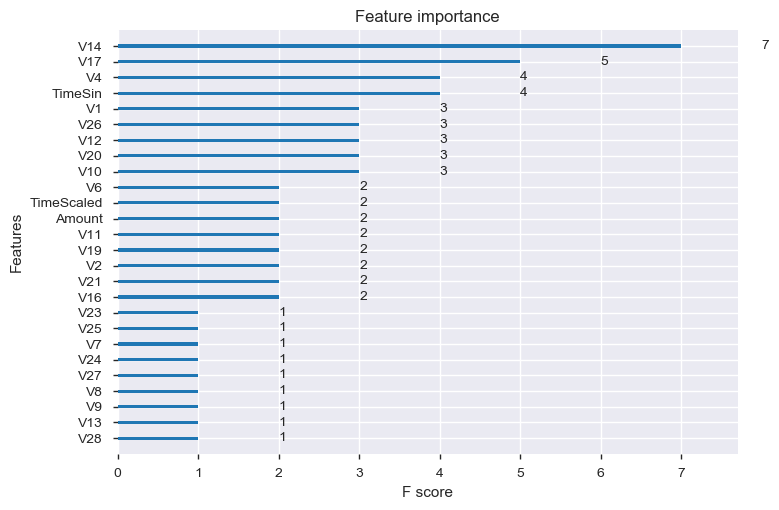

In [159]:
xgb.plot_importance(bst)

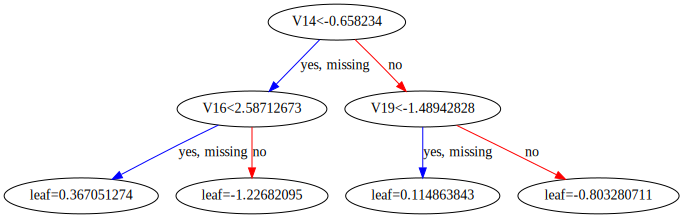

In [157]:
xgb.to_graphviz(bst, num_trees=7)